# Load Model and Do Prediction

In [1]:
import os
import cv2                
import matplotlib.pyplot as plt   
import pandas as pd
from PIL import Image
from tensorflow.keras.preprocessing import image                  
from tqdm import tqdm
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

In [2]:
model=tf.keras.models.load_model(('10_e_Of_113.hdf5'),compile=False,custom_objects={'KerasLayer':hub.KerasLayer})
dff1=pd.read_csv('dog_breeds.csv')
dog_names=dff1['dog_breeds'].tolist()

In [3]:
def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [4]:
def predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = path_to_tensor(img_path).astype('float32')/255
    # obtain predicted vector
    predicted_vector = model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    df = pd.DataFrame(data={'Prediction': predicted_vector.reshape(-1), 'Dog Breed': dog_names})
    df_sort=df.head(n=5)
    df_sort=df_sort.to_dict('dict')
    df=df.sort_values(['Prediction'], ascending=False)
    df_sort=df.head(n=5)
    df_sort=list(map(lambda x: ({"Prediction": df_sort["Prediction"][x]*100, "Dog Breed": df_sort["Dog Breed"][x]}), list(df_sort["Prediction"].keys())))
    
    fig = plt.figure(figsize=(10,10))
    rows = 2
    columns = 2
    fig.add_subplot(rows, columns, 1)
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.title("Orignal")
    fig.add_subplot(rows, columns, 2)
    imgg=cv2.imread(img_path)
    bigger = cv2.resize(imgg, (244, 244))
    cv_rgbb = cv2.cvtColor(bigger, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgbb)
    plt.title("Compress")
    

    print("Top 5 predictions are :\n")
    return df_sort
#     else:
#         print("No Dog Found !!!!!")
#         return df_sort

1/1 [==============================] - 1s 712ms/step
Top 5 predictions are :



[{'Prediction': 99.97768998146057, 'Dog Breed': 'Pomeranian'},
 {'Prediction': 0.018274584726896137, 'Dog Breed': 'Chihuahua'},
 {'Prediction': 0.002412996400380507, 'Dog Breed': 'Akita'},
 {'Prediction': 0.001281444747291971, 'Dog Breed': 'Chow_chow'},
 {'Prediction': 0.0001904733721858065, 'Dog Breed': 'american_pit_bull'}]

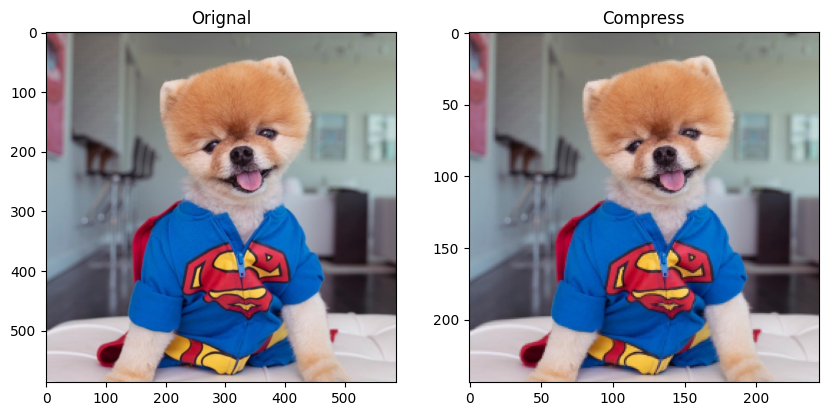

In [5]:
predict_breed('Test_images/16.jpg')